# Anshul Garg    101903332   4COE-13

### Libraries Import

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import math
from sklearn.ensemble import RandomForestRegressor

### Dataset Import 

In [2]:
dataset = pd.read_excel('DATASET.xlsx')

C:\Users\anshu\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\anshu\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [3]:
dataset

,Unnamed: 0,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2,324.0,161.1,18.2,0.0,4,106,5950,1190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,3,324.0,170.7,18.5,0.0,4,110,5950,1190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4,324.0,223.9,18.9,0.0,3,110,6150,1340,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,5,324.0,228.2,18.4,0.0,2,113,6340,1450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,NaN,6,454.0,931.8,13.6,125.0,13,116,4150,830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1006,NaN,7,454.0,703.0,14.5,17.0,13,118,4150,830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1007,NaN,8,454.0,1124.1,14.9,45.0,18,117,4200,840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,NaN,9,454.0,1462.3,13.2,62.0,27,117,4400,720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
j = 0
for i in range(100):
    dataset.iloc[j:j + 10, 0] = dataset.iloc[j, 0]
    j += 10

### Data Preprocessing

In [5]:
dataset.columns = dataset.columns.str.replace('Unnamed: 0', 'Section')

In [6]:
#Replacing empty cells with zero
dataset.fillna(0, inplace=True)

In [7]:
#Test Dataset
test_dataset = dataset.loc[dataset['year'] == 10]
test_dataset

,Section,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,Sec_2,10,327.7,62.0,22.7,0.0,2,102,30525,10234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29,Sec_3,10,487.7,93.2,22.5,0.0,4,110,2140,1270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,Sec_4,10,543.6,93.2,22.5,0.0,4,110,2140,1270,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,Sec_5,10,434.4,149.0,11.7,72.0,3,110,13142,6225,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
969,Sec_97,10,514.0,1226.4,10.1,203.6,16,114,7672,303,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
979,Sec_98,10,901.0,1531.0,11.1,34.9,40,100,15150,1077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
989,Sec_99,10,1181.0,1364.9,9.2,274.3,24,112,12500,880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999,Sec_100,10,662.0,1110.7,12.8,33.2,27,117,3324,1356,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
test_dataset.columns = test_dataset.columns.str.replace('Unnamed: 0', 'Section')

In [9]:
dataset.head(21)

,Section,year,Para-1,Para-2,Para-3,Para-4,Para-5,Para-6,Para-7,Para-8,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,Sec_1,1,324.0,354.5,17.0,0.0,3,117,2600,400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Sec_1,2,324.0,161.1,18.2,0.0,4,106,5950,1190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Sec_1,3,324.0,170.7,18.5,0.0,4,110,5950,1190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sec_1,4,324.0,223.9,18.9,0.0,3,110,6150,1340,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sec_1,5,324.0,228.2,18.4,0.0,2,113,6340,1450,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Sec_1,6,324.0,225.0,17.2,0.0,4,114,6630,1500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Sec_1,7,324.0,130.0,18.4,0.0,3,103,6700,1540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Sec_1,8,324.0,100.6,19.0,0.0,2,114,6740,1590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Sec_1,9,324.0,176.5,19.0,0.0,3,108,7175,1787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Sec_1,10,324.0,53.6,19.0,0.0,2,105,7567,1885,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Definition 

In [10]:
etr = ExtraTreesRegressor(n_estimators=200,bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=1000,
                    min_impurity_decrease=0.0, 
                    min_samples_leaf=1,
                    min_weight_fraction_leaf=0.1,
                    n_jobs=None, oob_score=False, random_state=123, verbose=0,
                    warm_start=False)

In [11]:
predict_col_names = ['Para-9', 'Para-10', 'Para-11', 'Para-12', 'Para-13']

In [12]:
result = {'Para-9': [], 'Para-10': [], 'Para-11': [], 'Para-12': [], 'Para-13': []}

In [13]:
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

## Model Application

In [14]:
def selectedModel(val):
    RMSE = []
    N = 0
    index = 0
    #For Applying ExtraTreesRegressor
    if(val==0):
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                #Extracting Train and Test Data
                xtrain = dataset.iloc[i:i+9, 1:10]
                ytrain = dataset.iloc[i:i+9, j]
                xtest = dataset.iloc[i+9, 1:10].to_numpy()
                ytest = dataset.iloc[i+9, j]

                #Applying Random Forest 
                etr.fit(xtrain, ytrain)

                #Predicting Values
                ypred = etr.predict(xtest.reshape(1,-1))[0]

                #Appending Results
                result[predict_col_names[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
            
    #For Applying Random Forest    
    else:
        for j in [10, 11, 12, 13, 14]:
            ans = 0
            count = 0
            for i in range(0, 1000, 10):
                #Extracting Train and Test Data
                xtrain = dataset.iloc[i:i+9, 1:10]
                ytrain = dataset.iloc[i:i+9, j]
                xtest = dataset.iloc[i+9, 1:10].to_numpy()
                ytest = dataset.iloc[i+9, j]

                #Applying Random Forest 
                rf.fit(xtrain, ytrain)

                #Predicting Values
                ypred = rf.predict(xtest.reshape(1,-1))[0]

                #Appending Results
                result[predict_col_names[index]].append(ypred)
                ans += (ytest - ypred)**2
                count += 1
                N += 1

            RMSE.append(ans)
            index += 1
    return (RMSE, count)

In [15]:
#Applying Random Forest
result_RMSE, result_count = selectedModel(1)

In [16]:
dataset_predicted = pd.DataFrame.from_dict(result)
dataset_predicted

,Para-9,Para-10,Para-11,Para-12,Para-13
0,2.5015,53.0868,37.335,7.579,1.892430
1,56.0135,27.8117,0.885,7.610,0.788332
2,64.2127,0.0000,0.000,11.257,1.361942
3,15.9736,53.1660,57.167,6.998,1.797542
4,0.0000,247.1847,33.835,5.890,1.678023
...,...,...,...,...,...
95,0.0000,109.9675,14.688,3.664,1.353677
96,163.9678,176.6288,8.830,7.289,1.503908
97,4.0836,57.8961,21.501,11.673,1.064197
98,96.5461,55.9914,12.140,10.738,0.889464


## RMSE Calculations- 

In [17]:
#RMSE for each column
for i in result_RMSE:
    print((i/result_count)**0.5)

69.13927333957166
67.6571262677001
27.93206290346991
15.01123515970621
0.24427729263442863


In [18]:
result_RMSE

[478023.9117924004,
 457748.67348035134,
 78020.01380433998,
 22533.718101999995,
 5.967139569680628]

In [19]:
#Total RMSE
print((sum(result_RMSE)/500)**0.5)

45.52652598911236


## Result Plots 

In [20]:
#Selecting random 40 rows
import random
ind = []
for i in range(40):
    ind.append(random.randint(0,100))

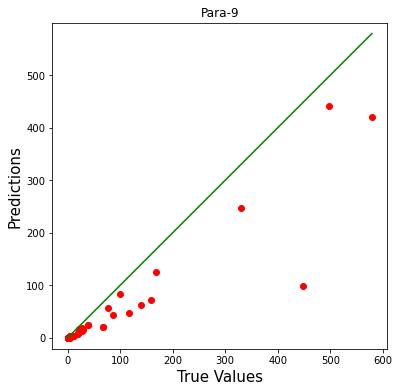

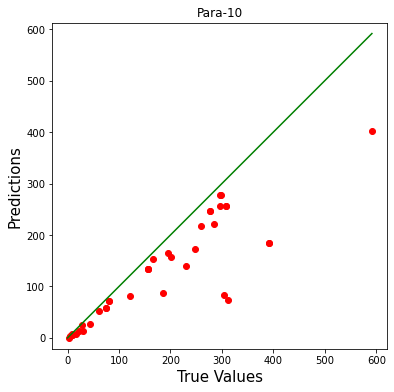

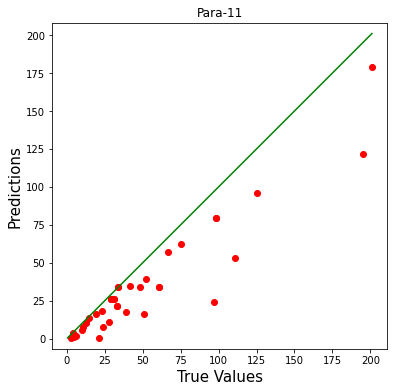

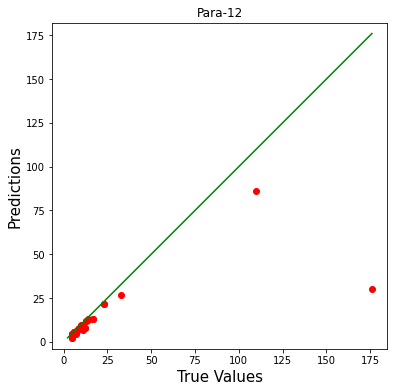

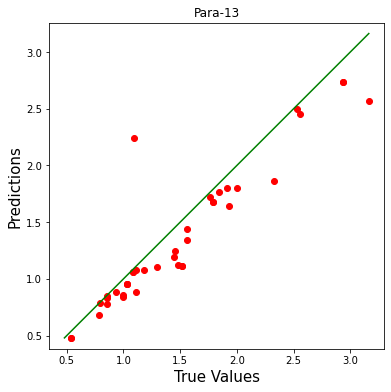

In [25]:
#Scatter plot for random 40 rows out of 100 for each target column
for i in range(5):
    plt.figure(figsize=(6,6))
    true_value = test_dataset.iloc[ind, i+10]
    predicted_value = dataset_predicted.iloc[ind, i]
    plt.scatter(true_value, predicted_value, c='red')

    p1 = max(max(predicted_value), max(true_value))
    p2 = min(min(predicted_value), min(true_value))
    plt.plot([p1, p2], [p1, p2], 'g-')
    plt.title(predict_col_names[i])
    plt.xlabel('True Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()